In [1]:
# !pip install yfinance
# !pip install prophet
# !pip install matplotlib

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

c:\Users\fafaf\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
stock_symbols = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'meta', 'JPM', 'JNJ', 'V',
    'PG', 'DIS', 'MA', 'UNH', 'HD', 'PYPL', 'BAC', 'NFLX', 'XOM', 'VZ',
    'KO', 'PEP', 'MRK', 'INTC', 'T', 'PFE', 'CSCO', 'WMT', 'BA', 'NKE',
    'GS', 'MCD', 'ADBE', 'COST', 'IBM', 'CRM', 'ORCL', 'WFC', 'MDT', 'C',
    # Add more symbols to reach 500
]

In [4]:
# Fetch historical data for a single stock from Yahoo Finance
def fetch_stock_data(symbol, start_date='2015-01-01'):
    data = yf.download(symbol, start=start_date)
    data.reset_index(inplace=True)
    # Prophet requires columns as 'ds' and 'y'
    stock_data = data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    return stock_data

In [5]:
# Configure and train Prophet model for each stock
def train_prophet(stock_data, stock_name, yearly_seasonality=True, daily_seasonality=False, holidays=None, changepoint_prior_scale=0.05):
    # Initialize Prophet with customized parameters
    m = Prophet(yearly_seasonality=yearly_seasonality,
                    daily_seasonality=daily_seasonality,
                    holidays=holidays,
                    changepoint_prior_scale=changepoint_prior_scale)

    # Fit the model to stock data
    m.fit(stock_data)

    # Forecast for the next 365 days
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)

    # Plot forecast
    fig = m.plot(forecast)
    plt.title(f'Forecast for {stock_name}')
    plt.show()

    # Return the forecast for further analysis
    return forecast

In [6]:
# Function to iterate over all stocks and forecast their prices
def forecast_stocks(symbols, start_date='2015-01-01'):
    for symbol in symbols:
        print(f"Processing stock: {symbol}")
        # Fetch stock data
        stock_data = fetch_stock_data(symbol, start_date)

        # Train Prophet model
        forecast = train_prophet(stock_data, symbol)

        # Save the forecast as CSV
        forecast.to_csv(f'forecast_{symbol}.csv', index=False)

In [7]:
# Customize Prophet parameters (you can tweak them in the notebook)
yearly_seasonality = True
daily_seasonality = False
holidays = None  # You can define holidays if needed
changepoint_prior_scale = 0.05  # Control the flexibility of the model

[*********************100%***********************]  1 of 1 completed
19:13:47 - cmdstanpy - INFO - Chain [1] start processing
19:13:48 - cmdstanpy - INFO - Chain [1] done processing


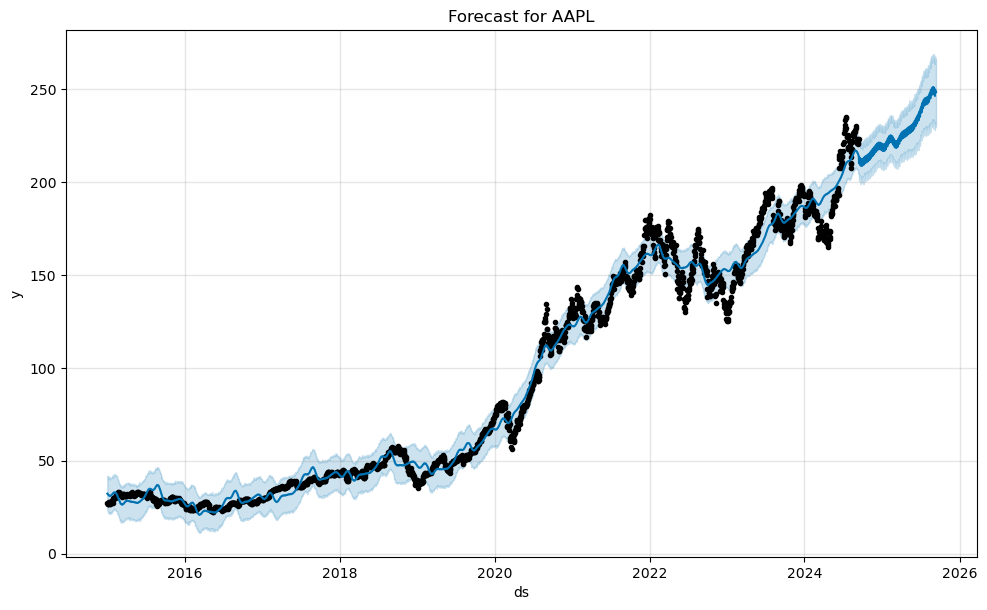

In [8]:
# Example usage: Forecast for a single stock to demonstrate
example_stock = 'AAPL'
example_data = fetch_stock_data(example_stock)
example_forecast = train_prophet(example_data, example_stock)

In [9]:
import pandas as pd

# URL of the Wikipedia page containing the S&P 500 list
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Scrape the data from the first table on the page
sp500_table = pd.read_html(url)[0]

# Sort by Symbol (or you could sort by Market Cap if you have that data)
sp500_table = sp500_table.head(500)  # Top 100 based on their order in the table

# Extract the list of stock symbols
sp500_table = sp500_table['Symbol'].tolist()

# Print the list of top 100 stock symbol
sp500_table

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG'

In [ ]:
for symbol in sp500_table:
    try:
      print(f"Processing stock: {symbol}")
      # Fetch stock data
      stock_data = fetch_stock_data(symbol)

      # Train Prophet model
      forecast = train_prophet(stock_data, symbol)

      # Save the forecast as CSV
      forecast.to_csv(f'forecast_{symbol}.csv', index=False)
    except Exception as e:
      print(f"Error processing stock {symbol}: {e}")